# Exploratory Data Analysis on Global Terrorism

Siripangi Sai Teja
GRIP JUNE 23
Data Science and Business Analytics
Task 4

Exploratory Data Analysis (EDA) is a fundamental step in the data analysis process that aims to understand the characteristics of a dataset before applying any formal statistical techniques. Through EDA, data scientists delve into the raw data, uncovering patterns, relationships, and outliers, while also assessing the quality and integrity of the information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
rawdata = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\terrorism.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_10184\810298313.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  rawdata = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\terrorism.csv")


In [21]:
rawdata.head(4)

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
rawdata.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
           'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
           'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
           'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)

In [5]:
data=rawdata[['Year','Month','Day','Country','State','Region','City','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type']]

In [6]:
data.head()

,Year,Month,Day,Country,State,Region,City,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


# Years With Most Attacks

In [7]:
data['Year'].value_counts()[:10]

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

<Axes: title={'center': 'Years with most attacks'}>

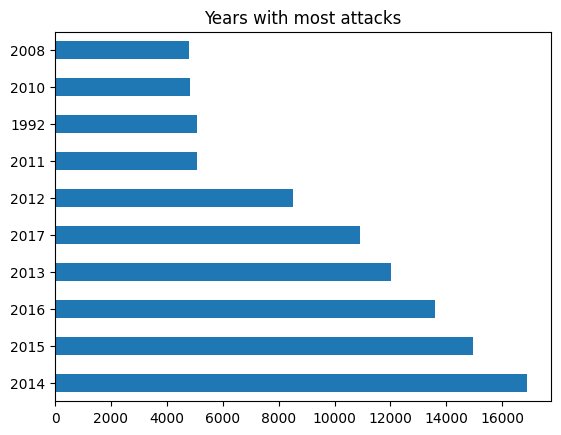

In [41]:
data['Year'].value_counts()[:10].plot(kind='barh', title ='Years with most attacks')

# Countries with Most Attacks

In [8]:
data['Country'].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

<Axes: title={'center': 'Most affected countries'}>

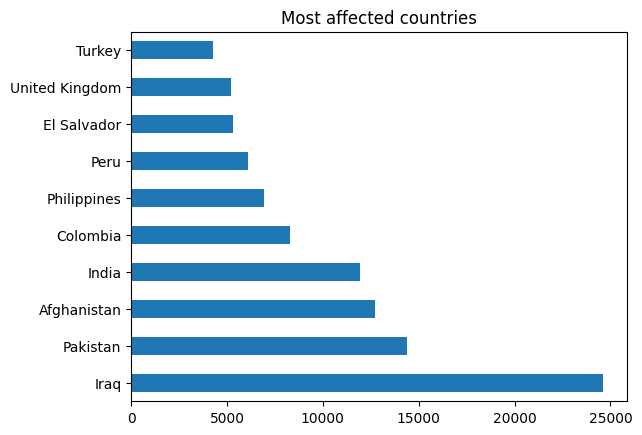

In [9]:
data['Country'].value_counts()[:10].plot(kind='barh', title ='Most affected countries')

# States With Most Attacks

In [10]:
data['State'].value_counts()[:10]

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

<Axes: title={'center': 'Most affected States'}>

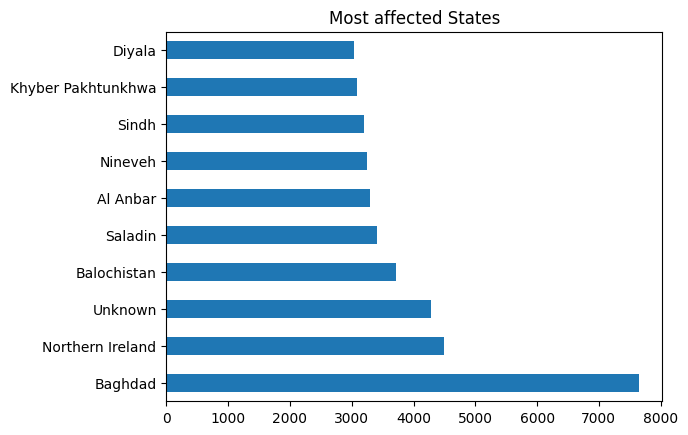

In [11]:
data['State'].value_counts()[:10].plot(kind='barh',title='Most affected States')

# Cities with most attacks

In [12]:
data['City'].value_counts()[:10]

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

<Axes: title={'center': 'Most affected cities'}>

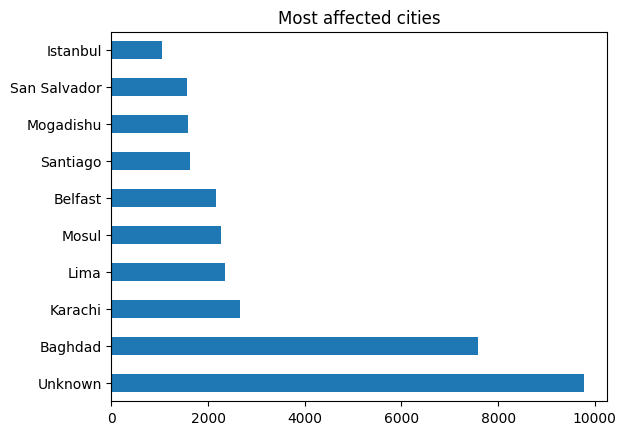

In [13]:
data['City'].value_counts()[:10].plot(kind='barh',title='Most affected cities')


# Regions with most attacks

In [14]:
data['Region'].value_counts()[:10]

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

<Axes: title={'center': 'Most attacked regions'}>

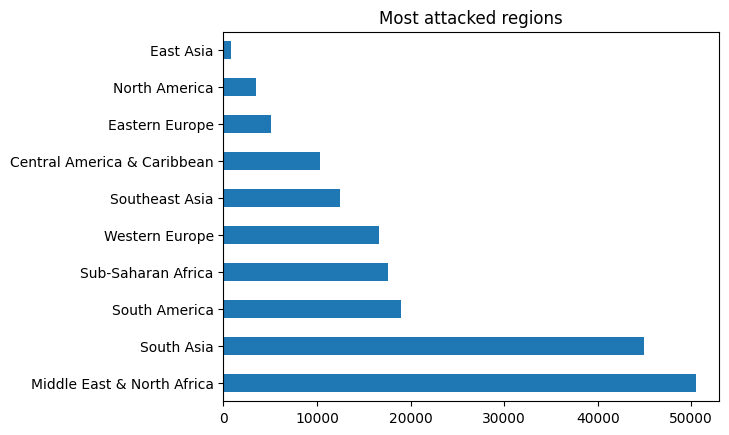

In [15]:
data['Region'].value_counts()[:10].plot(kind='barh', title='Most attacked regions')

# Most active Terrorist Groups

In [16]:
data['Group'].value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

<Axes: title={'center': 'Most active terrorist groups'}>

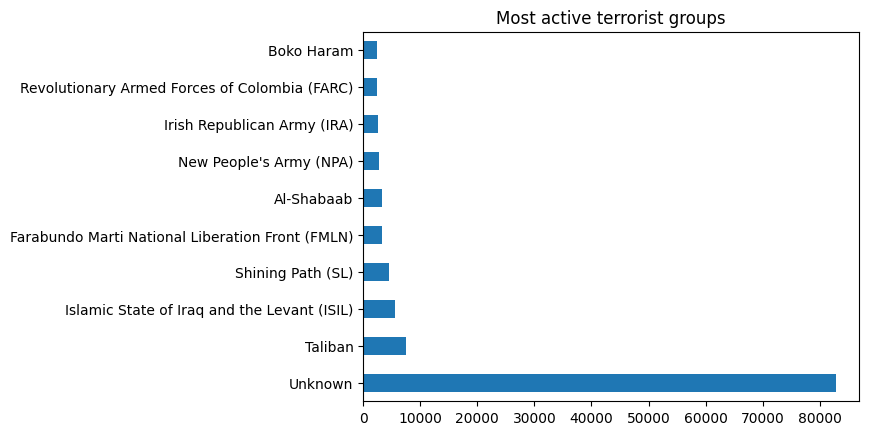

In [17]:
data['Group'].value_counts()[:10].plot(kind='barh', title='Most active terrorist groups')

# Attack type

In [18]:
data['AttackType'].value_counts()[:10]

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

<Axes: title={'center': 'Most used attack type'}>

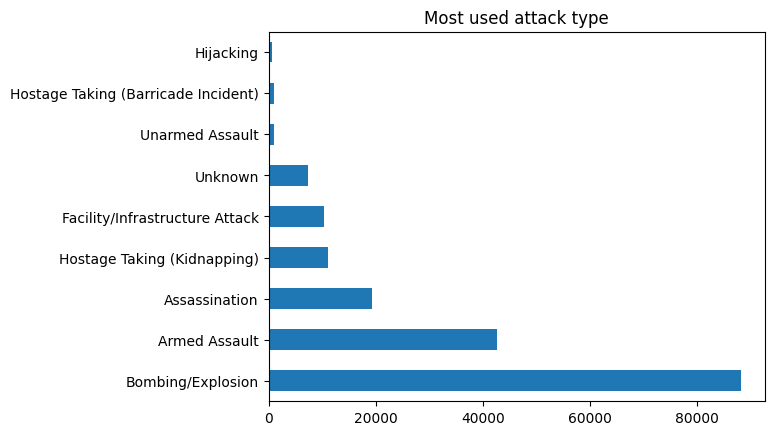

In [19]:
data['AttackType'].value_counts()[:10].plot(kind='barh', title='Most used attack type')

# Conclusion
* The year with most terrorist attacks - 2014
* Country with most terrorist attacks - Iraq 
* State with most terrorist attacks - Baghdad 
* City with most terrorist attacks - Baghdad 
* Region with most terrorist attacks - Middle East & North Africa
* Most active terrorist group - Taliban  
* Most deaths are caused by "Bombing"